In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset_France_combined.csv")

In [3]:
df

,Unnamed: 0,Entreprise,Localisation,Titre,Type de contrat,domaine_it,Contrat
0,0,ZONOVA,Paris (75),Architecte Systèmes et Réseaux (H/F),CDIContrat travail,Infrastructure,CDI
1,1,ZeTrace,35000 Rennes,Product Owner technique FREELANCE H/F,Temps plein,Gestion de projet,CDI
2,2,Yousign,75008 Paris,Security Engineer (F/M/X),CDIContrat travail,Développement,CDI
3,3,Younup,Nantes (44),Développeur .Net (H/F),CDI,Développement,CDI
4,4,XEFI ACADEMY,Paris (75),DEVELOPPEUR EN ALTERNANCE (H/F),CDD - 12 MoisContrat apprentissage,Développement,CDD
...,...,...,...,...,...,...,...
1811,1811,Forums Talents Handicap,Paris (75),Technicien / Technicienne programmation,CDIContrat travail,Support technique,CDI
1812,1812,Forums Talents Handicap,Paris (75),Technicien / Technicienne télécoms et réseaux,CDIContrat travail,Infrastructure,CDI
1813,1813,Forums Talents Handicap,Paris (75),TECHNICIEN DE MAINTENANCE (H/F),CDD - 3 MoisContrat travail,Support technique,CDD
1814,1814,Forums Talents Handicap,Paris (75),Technicien informatique (H/F),CDIContrat travail,Support technique,CDI


In [4]:
df.head(10)

,Entreprise,Localisation,Titre,Type de contrat
0,ZONOVA,NaN,Architecte Systèmes et Réseaux (H/F),CDIContrat travail
1,ZeTrace,35000 Rennes,Product Owner technique FREELANCE H/F,Temps plein
2,Yousign,75008 Paris,Security Engineer (F/M/X),NaN
3,Younup,Nantes (44),Développeur .Net (H/F),CDI
4,XEFI ACADEMY,NaN,DEVELOPPEUR EN ALTERNANCE (H/F),CDD - 12 MoisContrat apprentissage
5,WorldWide People,69000 Lyon,213351/Développeur Planisware confirmé / senio...,Indépendant / freelance
6,WorldWide People,79000 Niort,213756-1/Administrateur Réseaux et Sécurité Sw...,Indépendant / freelance
7,Workster,Hauts-de-France,Agent de Support Technique International H/F/X...,Temps plein
8,WIZBII,NaN,Développeur Data (H/F),CDIContrat travail
9,Weishaupt,68000 Colmar,ALTERNANCE - Technicien Support Informatique H...,Temps plein


In [5]:
df.isnull().sum()

Entreprise          55
Localisation       903
Titre                0
Type de contrat     81
dtype: int64

In [6]:
def detect_domaine(Titre):
    poste = str(Titre).lower()
    
    if any(word in poste for word in ['data analyst', 'business analyst', 'data scientist', 'analyst', 'business intelligence analyst', 
                                      'data visualization analyst', 'quantitative analyst', 'operations research analyst','dataeps engineer',
                                      'intelligence artificielle', 'machine learning','dataops engineer','test validation engineer',
                                      'test automation engineer','cloud computing and vitulisation enginner']):
        return 'Data Science'
        
    # Développement
    elif any(word in poste for word in ['développeur', 'developpeur', 'dev', 'développement logiciel', 'fullstack', 
                                        'backend', 'frontend', 'vhdl', 'c++', 'java', 'python', 'embarqué', 'logiciel', 'interconnect', 
                                        'software engineer','ingénieur commercial en it ou Télécom	']):
        return 'Développement'
        
    # Cybersécurité
    elif any(word in poste for word in ['cyber', 'cybersécurité', 'sécurité', 'conformité', 'gouvernance', 'isp',
                                        'integration of security in projects']):
        return 'Cybersécurité'
        
    # Infrastructure
    
    elif any(word in poste for word in ['réseau', 'système', 'infra', 'administrateur', 'windows server', 'serveur'
                                        , 'cloud', 'architecte technique', 'architecte système', 'hpc', 'exploit', 'exploitant', 'ldap',
                                        'sso', 'responsable informatique', 'it sme', 'transition manager']):
        return 'Infrastructure'
        
    # Gestion de projet
    elif any(word in poste for word in ['chef de projet', 'project manager', 'scrum', 'agile', 'product owner', 'moa', 'projets',
                                        'pmo', 'pilotage', 'coordonnateur', 'programme', 'run manager', 'proxy po', 'appui pilotage',
                                        'chargé de projet']):
        return 'Gestion de projet'
        
    # Tests / Validation
    elif any(word in poste for word in ['testeur', 'test', 'qa', 'validation', 'recette']):
        return 'Tests / Validation'
        
    # Support technique
    elif any(word in poste for word in ['technicien', 'support', 'maintenance', 'helpdesk', 'parc informatique', 'opérateur pc',
                                        'correspondant informatique', 'suivi technique']):
        return 'Support technique'
        
    # SIG / Cartographie
    elif any(word in poste for word in ['cartographe', 'sig', 'géomatique']):
        return 'SIG / Cartographie'
        
    # Conseil / ERP / AMOA
    elif any(word in poste for word in ['consultant', 'amoa', 'fonctionnel', 'avant-vente', 'sap', 'oracle', 'ebs', 'sirh']):
        return 'Conseil / ERP / AMOA'
        
    # Systèmes métiers
    elif any(word in poste for word in ['crm', 'référentiels', 'assistant recette']):
        return 'Systèmes métiers'
        
    # Formation / Alternance
    elif any(word in poste for word in ['apprenti', 'alternant', 'bachelor', 'formation']):
        return 'Formation / Alternance'

    
    # Architecture SI
    elif any(word in poste for word in ['architecte d\'entreprise', 'architecte applicatif', 'responsable domaine it',
                                        'responsable applicatif it', 'architecte']):
        return 'Architecture SI'
    else:
        return 'Autre'

In [7]:
df['domaine_it'] = df['Titre'].apply(detect_domaine)

In [8]:
df

,Entreprise,Localisation,Titre,Type de contrat,domaine_it
0,ZONOVA,NaN,Architecte Systèmes et Réseaux (H/F),CDIContrat travail,Infrastructure
1,ZeTrace,35000 Rennes,Product Owner technique FREELANCE H/F,Temps plein,Gestion de projet
2,Yousign,75008 Paris,Security Engineer (F/M/X),NaN,Autre
3,Younup,Nantes (44),Développeur .Net (H/F),CDI,Développement
4,XEFI ACADEMY,NaN,DEVELOPPEUR EN ALTERNANCE (H/F),CDD - 12 MoisContrat apprentissage,Développement
...,...,...,...,...,...
1811,NaN,NaN,Technicien / Technicienne programmation,CDIContrat travail,Support technique
1812,NaN,NaN,Technicien / Technicienne télécoms et réseaux,CDIContrat travail,Infrastructure
1813,NaN,NaN,TECHNICIEN DE MAINTENANCE (H/F),CDD - 3 MoisContrat travail,Support technique
1814,NaN,NaN,Technicien informatique (H/F),CDIContrat travail,Support technique


In [9]:
df.isnull().sum()

Entreprise          55
Localisation       903
Titre                0
Type de contrat     81
domaine_it           0
dtype: int64

In [10]:
df['Contrat'] =df['Type de contrat'].str.extract(r'^(CDD|CDI|freelance|Stage|Freelance)' , expand = False)

In [11]:
df

,Entreprise,Localisation,Titre,Type de contrat,domaine_it,Contrat
0,ZONOVA,NaN,Architecte Systèmes et Réseaux (H/F),CDIContrat travail,Infrastructure,CDI
1,ZeTrace,35000 Rennes,Product Owner technique FREELANCE H/F,Temps plein,Gestion de projet,NaN
2,Yousign,75008 Paris,Security Engineer (F/M/X),NaN,Autre,NaN
3,Younup,Nantes (44),Développeur .Net (H/F),CDI,Développement,CDI
4,XEFI ACADEMY,NaN,DEVELOPPEUR EN ALTERNANCE (H/F),CDD - 12 MoisContrat apprentissage,Développement,CDD
...,...,...,...,...,...,...
1811,NaN,NaN,Technicien / Technicienne programmation,CDIContrat travail,Support technique,CDI
1812,NaN,NaN,Technicien / Technicienne télécoms et réseaux,CDIContrat travail,Infrastructure,CDI
1813,NaN,NaN,TECHNICIEN DE MAINTENANCE (H/F),CDD - 3 MoisContrat travail,Support technique,CDD
1814,NaN,NaN,Technicien informatique (H/F),CDIContrat travail,Support technique,CDI


In [12]:
import numpy as np
df['domaine_it'] = df['domaine_it'].replace('Autre' , np.nan) 

In [13]:
df

,Entreprise,Localisation,Titre,Type de contrat,domaine_it,Contrat
0,ZONOVA,NaN,Architecte Systèmes et Réseaux (H/F),CDIContrat travail,Infrastructure,CDI
1,ZeTrace,35000 Rennes,Product Owner technique FREELANCE H/F,Temps plein,Gestion de projet,NaN
2,Yousign,75008 Paris,Security Engineer (F/M/X),NaN,NaN,NaN
3,Younup,Nantes (44),Développeur .Net (H/F),CDI,Développement,CDI
4,XEFI ACADEMY,NaN,DEVELOPPEUR EN ALTERNANCE (H/F),CDD - 12 MoisContrat apprentissage,Développement,CDD
...,...,...,...,...,...,...
1811,NaN,NaN,Technicien / Technicienne programmation,CDIContrat travail,Support technique,CDI
1812,NaN,NaN,Technicien / Technicienne télécoms et réseaux,CDIContrat travail,Infrastructure,CDI
1813,NaN,NaN,TECHNICIEN DE MAINTENANCE (H/F),CDD - 3 MoisContrat travail,Support technique,CDD
1814,NaN,NaN,Technicien informatique (H/F),CDIContrat travail,Support technique,CDI


In [14]:
df.isnull().sum()

Entreprise          55
Localisation       903
Titre                0
Type de contrat     81
domaine_it         462
Contrat            564
dtype: int64

In [15]:
df.describe()

,Entreprise,Localisation,Titre,Type de contrat,domaine_it,Contrat
count,1761,913,1816,1735,1354,1252
unique,881,321,1693,54,12,3
top,Forums Talents Handicap,Paris (75),Technicien informatique (H/F),CDIContrat travail,Développement,CDI
freq,81,124,12,663,317,1054


In [16]:
! pip install messingno

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement messingno (from versions: none)
ERROR: No matching distribution found for messingno


<Axes: >

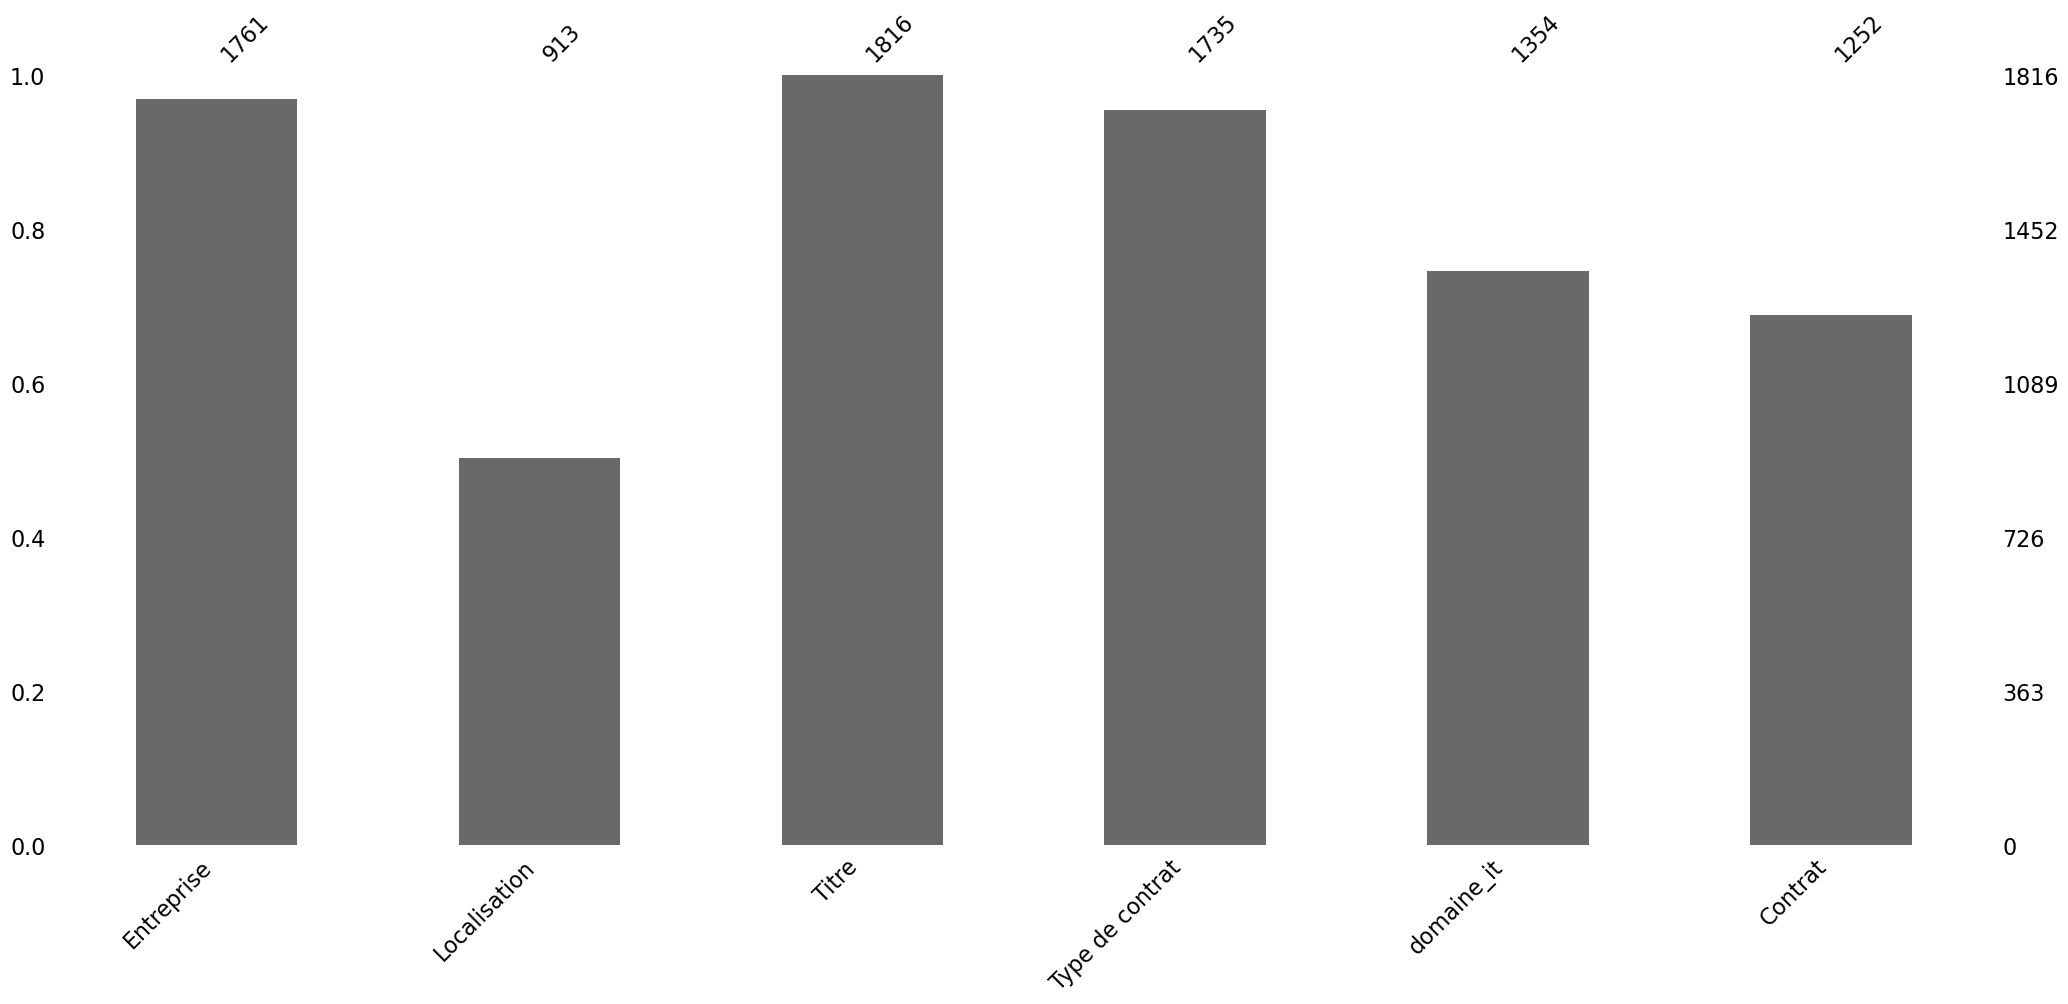

In [17]:
import missingno as msno
msno.bar(df)

<Axes: >

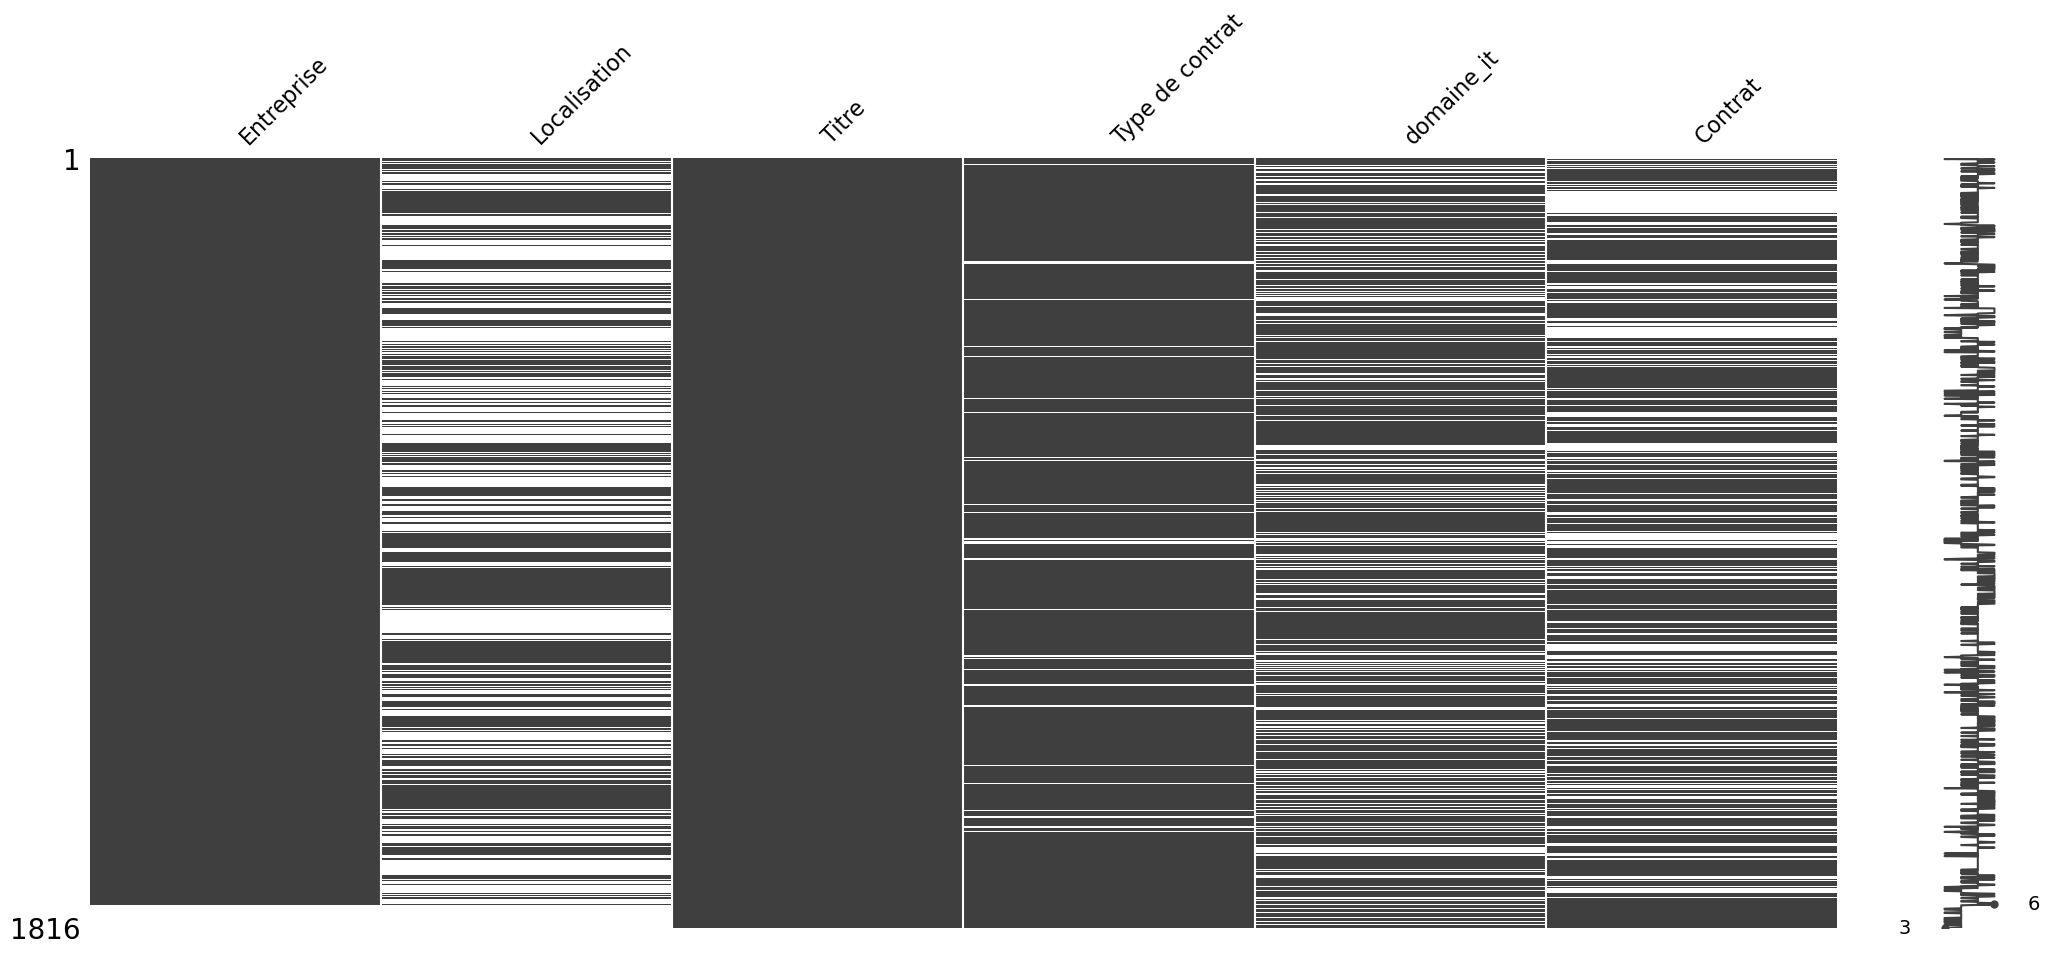

In [18]:
msno.matrix(df)

In [19]:
for col in df.columns:
    mode_col = df[col].mode().values[0]
    df[col] = df[col].fillna(mode_col)

In [20]:
df

,Entreprise,Localisation,Titre,Type de contrat,domaine_it,Contrat
0,ZONOVA,Paris (75),Architecte Systèmes et Réseaux (H/F),CDIContrat travail,Infrastructure,CDI
1,ZeTrace,35000 Rennes,Product Owner technique FREELANCE H/F,Temps plein,Gestion de projet,CDI
2,Yousign,75008 Paris,Security Engineer (F/M/X),CDIContrat travail,Développement,CDI
3,Younup,Nantes (44),Développeur .Net (H/F),CDI,Développement,CDI
4,XEFI ACADEMY,Paris (75),DEVELOPPEUR EN ALTERNANCE (H/F),CDD - 12 MoisContrat apprentissage,Développement,CDD
...,...,...,...,...,...,...
1811,Forums Talents Handicap,Paris (75),Technicien / Technicienne programmation,CDIContrat travail,Support technique,CDI
1812,Forums Talents Handicap,Paris (75),Technicien / Technicienne télécoms et réseaux,CDIContrat travail,Infrastructure,CDI
1813,Forums Talents Handicap,Paris (75),TECHNICIEN DE MAINTENANCE (H/F),CDD - 3 MoisContrat travail,Support technique,CDD
1814,Forums Talents Handicap,Paris (75),Technicien informatique (H/F),CDIContrat travail,Support technique,CDI


In [24]:
df.isnull().sum()

Entreprise         0
Localisation       0
Titre              0
Type de contrat    0
domaine_it         0
Contrat            0
dtype: int64

In [27]:
df.to_csv("Dataset_France_dinal.csv")

In [26]:
df['domaine_it'].value_counts() 

domaine_it
Développement             779
Infrastructure            309
Gestion de projet         192
Support technique         155
Data Science              101
Conseil / ERP / AMOA       97
Cybersécurité              81
Formation / Alternance     41
SIG / Cartographie         20
Tests / Validation         17
Architecture SI            17
Systèmes métiers            7
Name: count, dtype: int64

Text(0, 0.5, 'Nombres des offres')

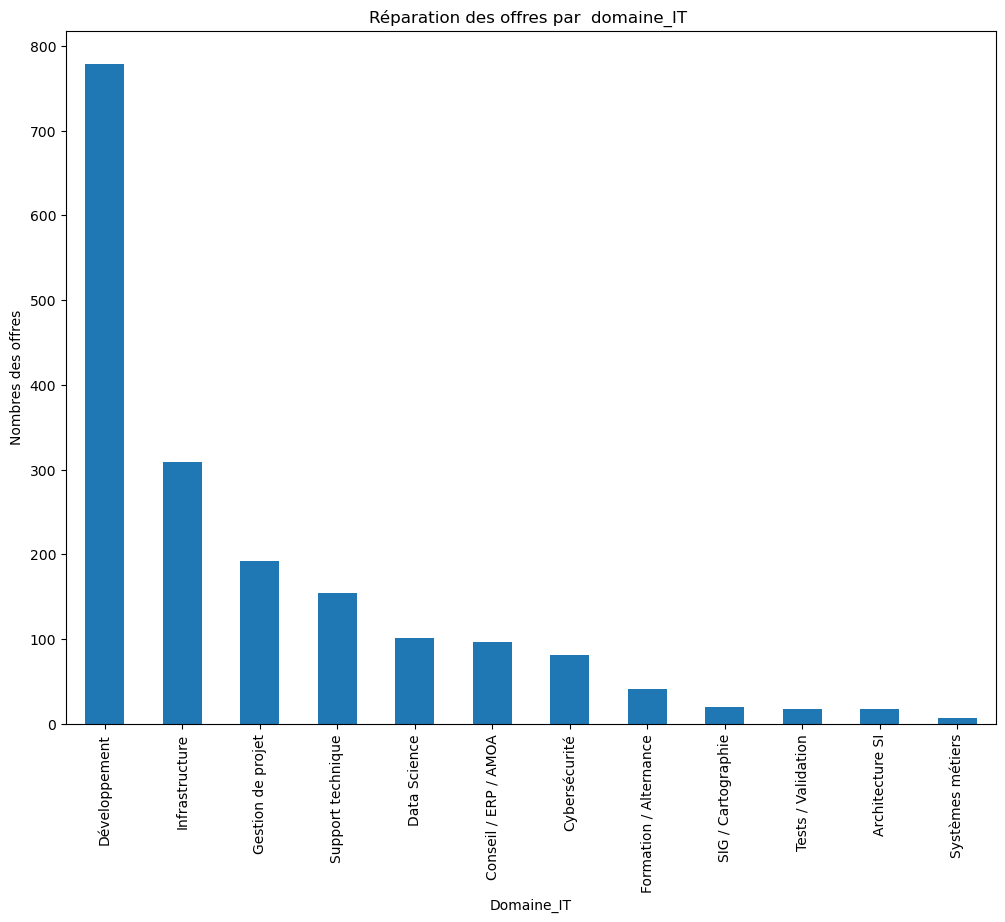

In [23]:
import matplotlib.pyplot as plt
df['domaine_it'].value_counts().plot.bar(figsize = (12 ,9))
plt.title("Réparation des offres par  domaine_IT ")
plt.xlabel("Domaine_IT")
plt.ylabel("Nombres des offres")


In [26]:
df1 = df.groupby(['domaine_it' ,'Titre']).size().reset_index(name = 'count')

# Trier les données par domaine et nombre de chaque titre
df_grouped = df1.sort_values(['domaine_it', 'count'], ascending=[True, False])

                                                                 
for domaine in df_grouped['domaine_it'].unique():
    df_domaine = df_grouped[df_grouped['domaine_it'] == domaine]
    print(f"Domaine : {domaine}")
    print(df_domaine.head(5))  # Afficher les 5  titre  les plus fréquentes pour chaque domaine_it
    print()

Domaine : Architecture SI
        domaine_it                                              Titre  count
0  Architecture SI  Architecte Applicatif Solution Circulation F/H...      1
1  Architecture SI          Architecte Application Solution IS/IT F/H      1
2  Architecture SI     Architecte IT - Services Financiers - Bordeaux      1
3  Architecture SI                                Architecte Solution      1
4  Architecture SI       Architecte Solution - Aérospatial - Toulouse      1

Domaine : Conseil / ERP / AMOA
              domaine_it                                      Titre  count
67  Conseil / ERP / AMOA  Consultant informatique fonctionnel (F/H)      2
74  Conseil / ERP / AMOA                     Consultant(e) SIRH F/H      2
17  Conseil / ERP / AMOA                       ASSISTANT SIRH (H/F)      1
18  Conseil / ERP / AMOA          Account Managing Consultant (H/F)      1
19  Conseil / ERP / AMOA        Alternant - Consultant IT M&A (H/F)      1

Domaine : Cybersécurité
     

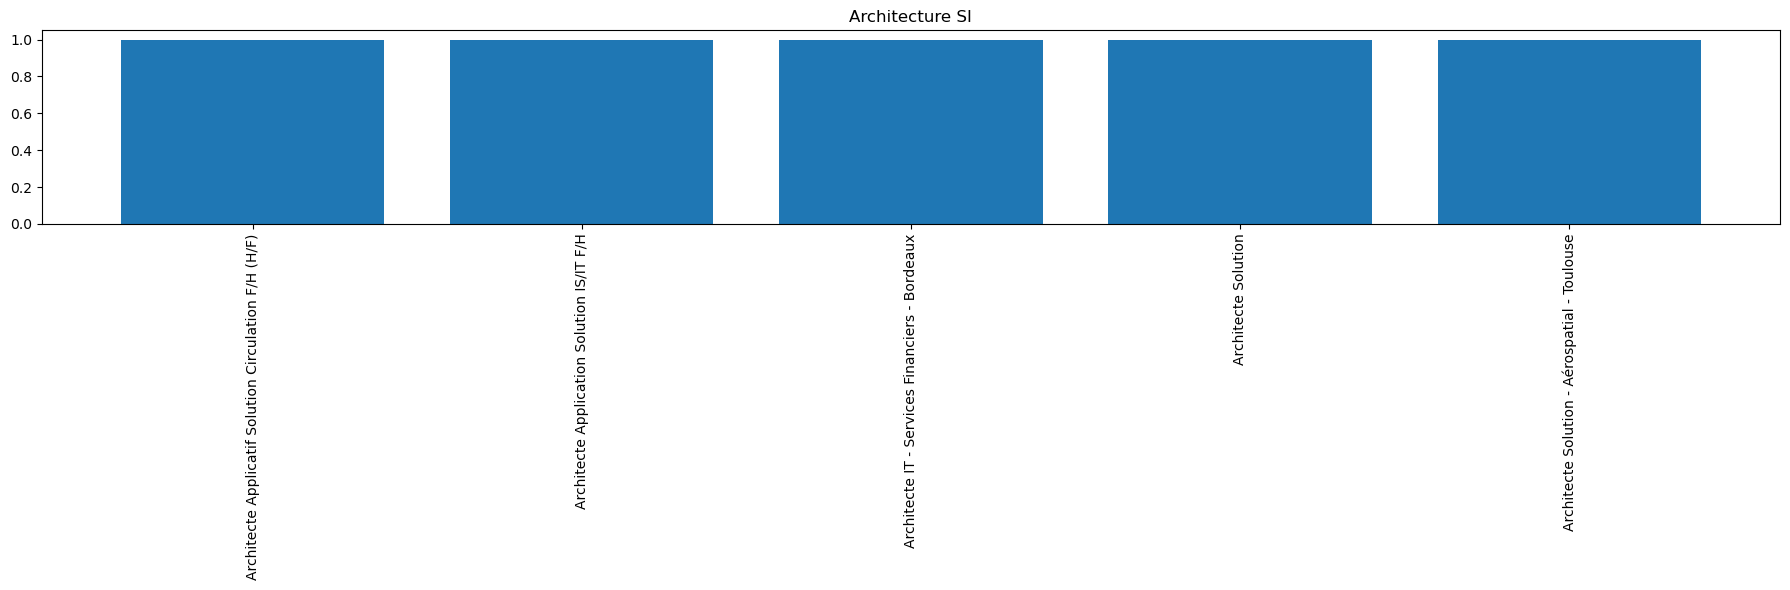

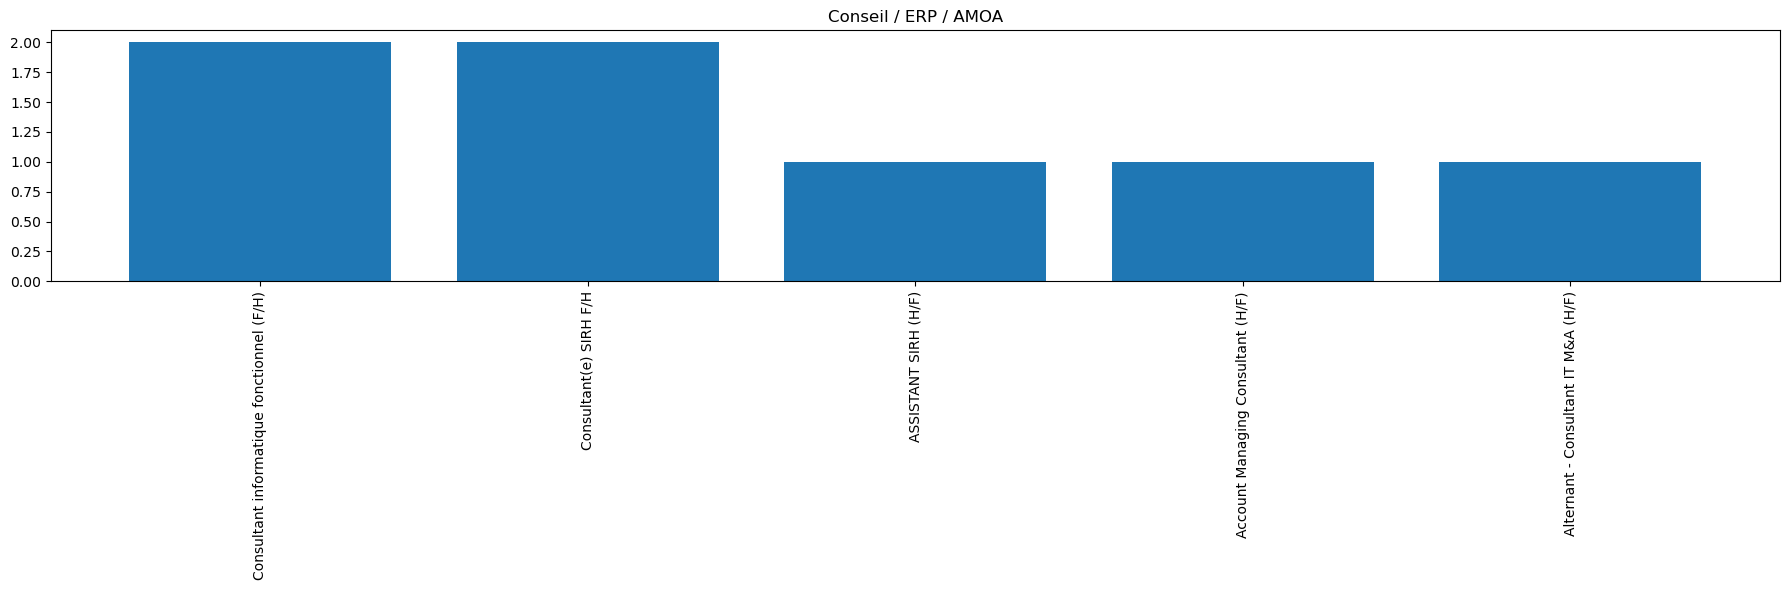

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_1692\1913113656.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Ajuster la mise en page pour éviter les coupures


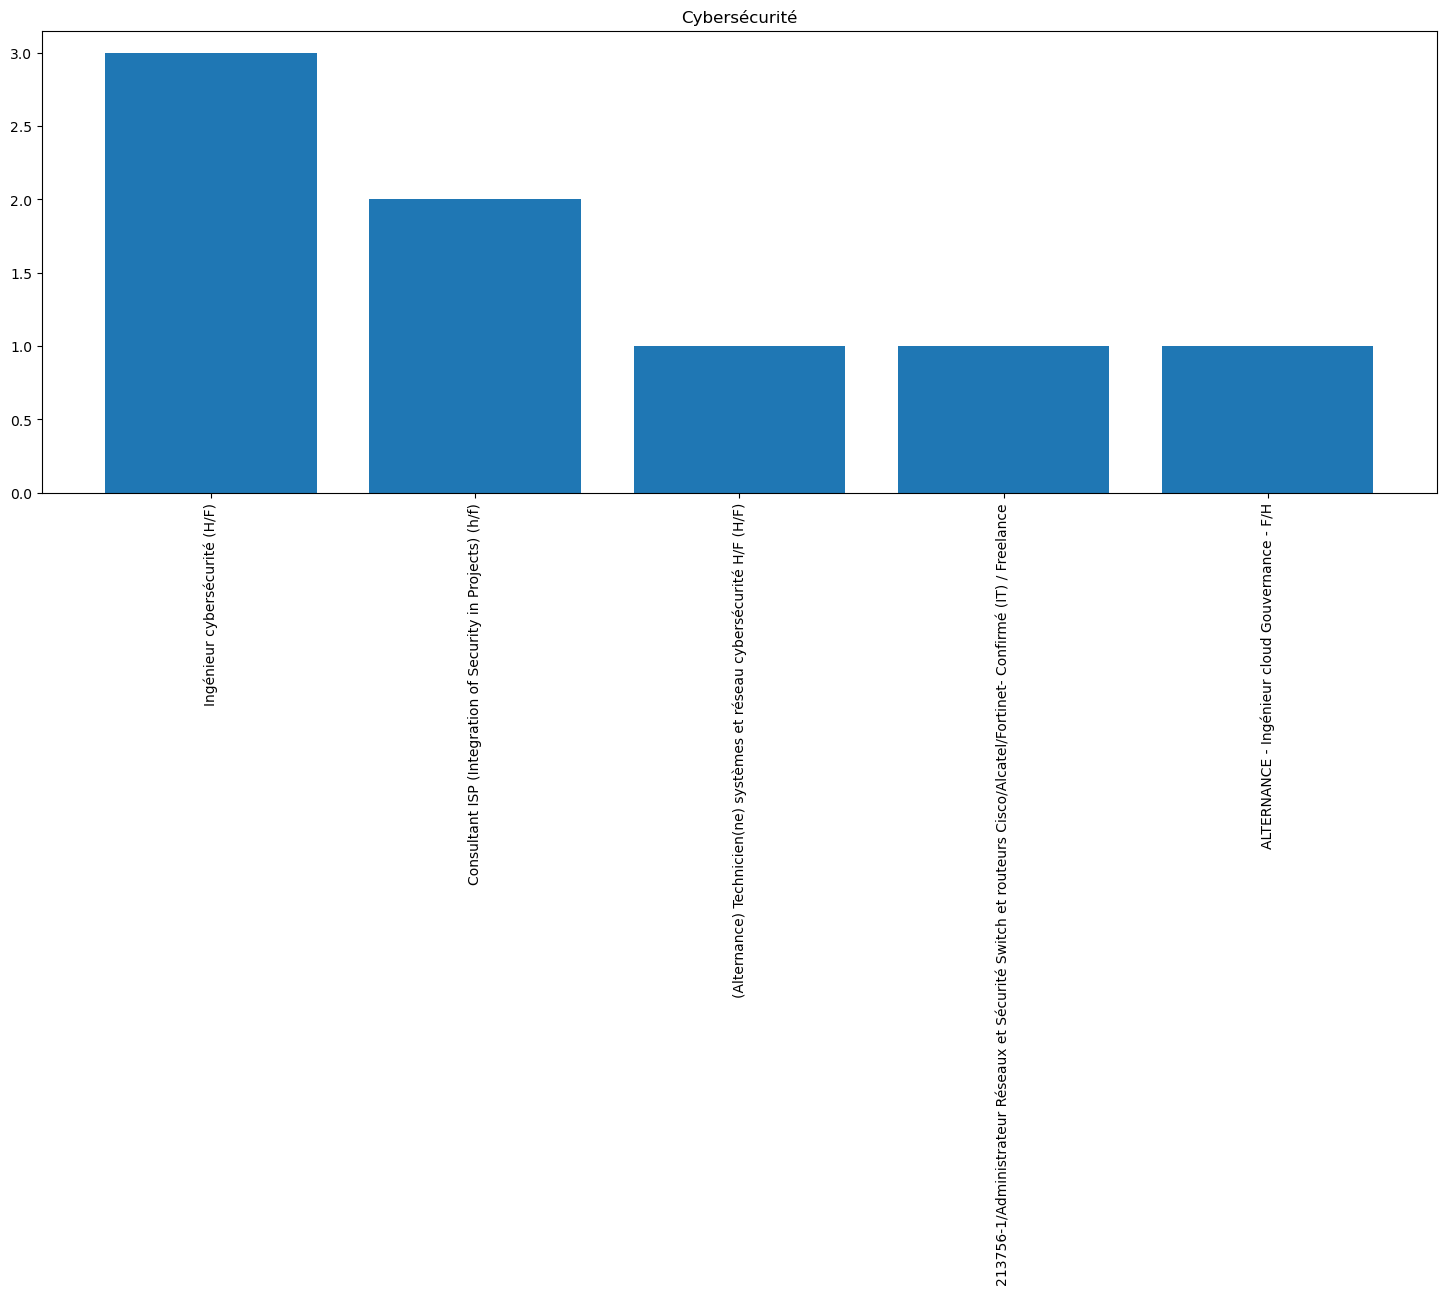

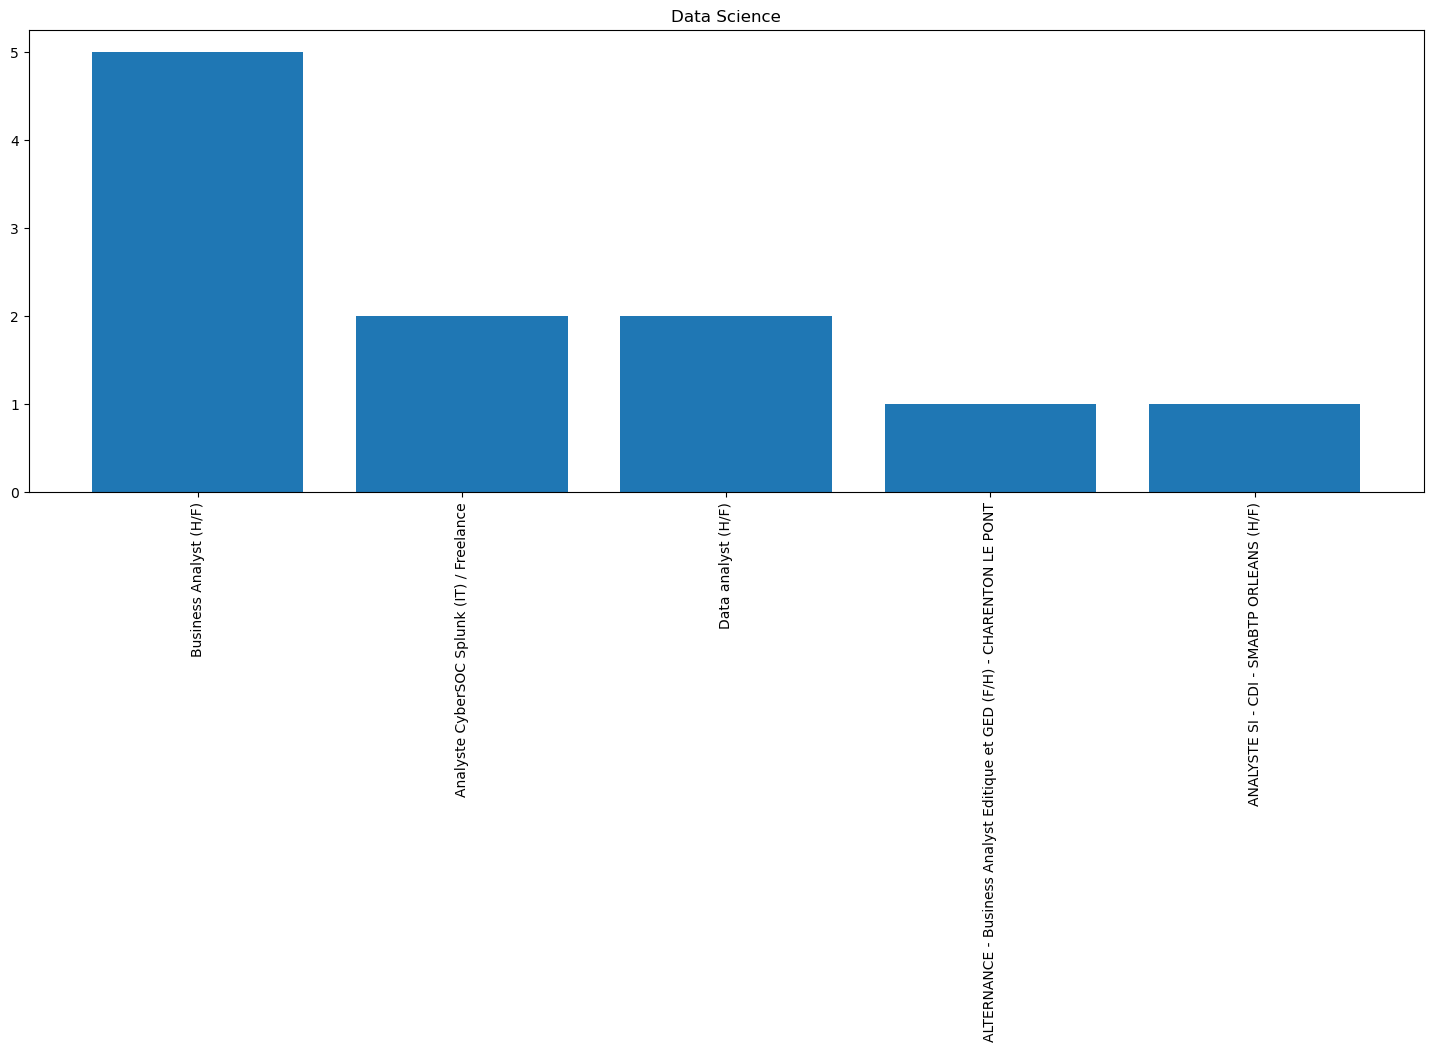

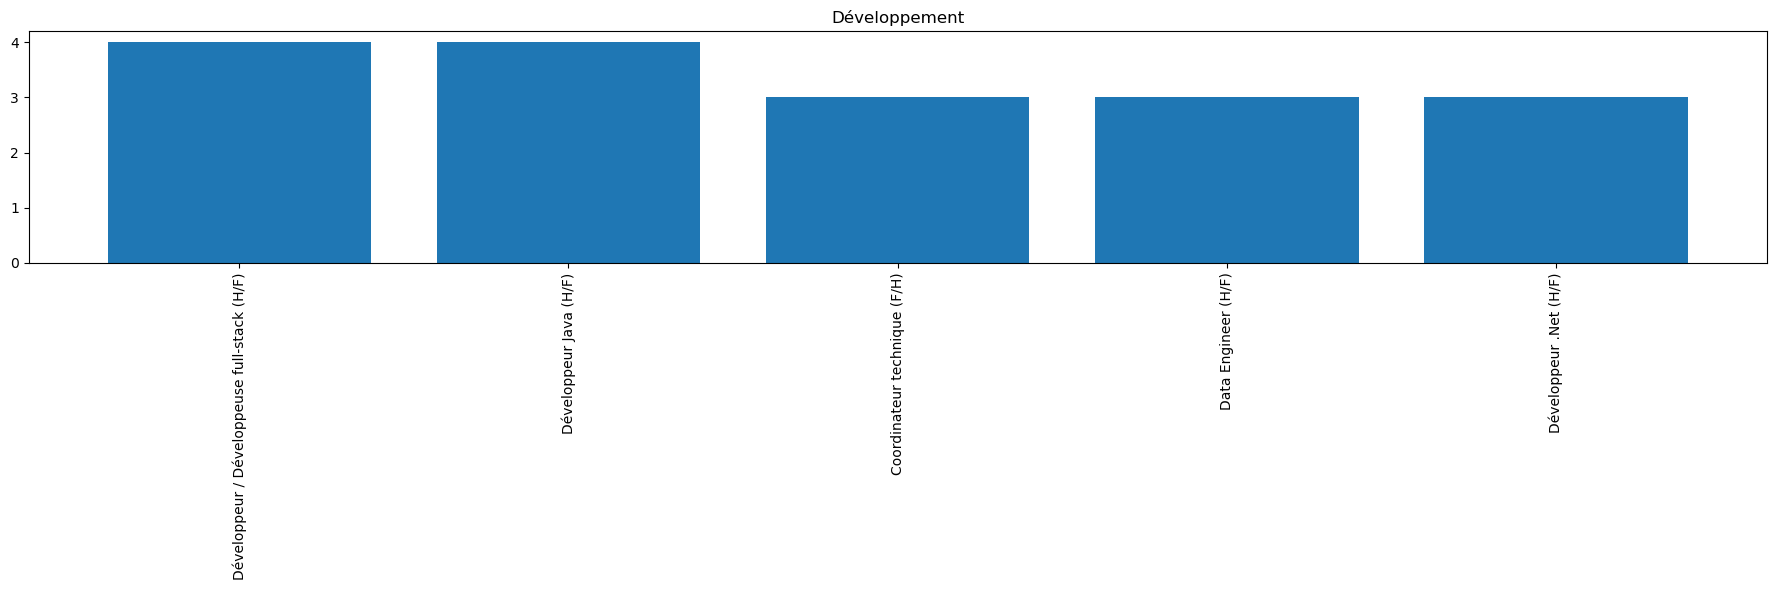

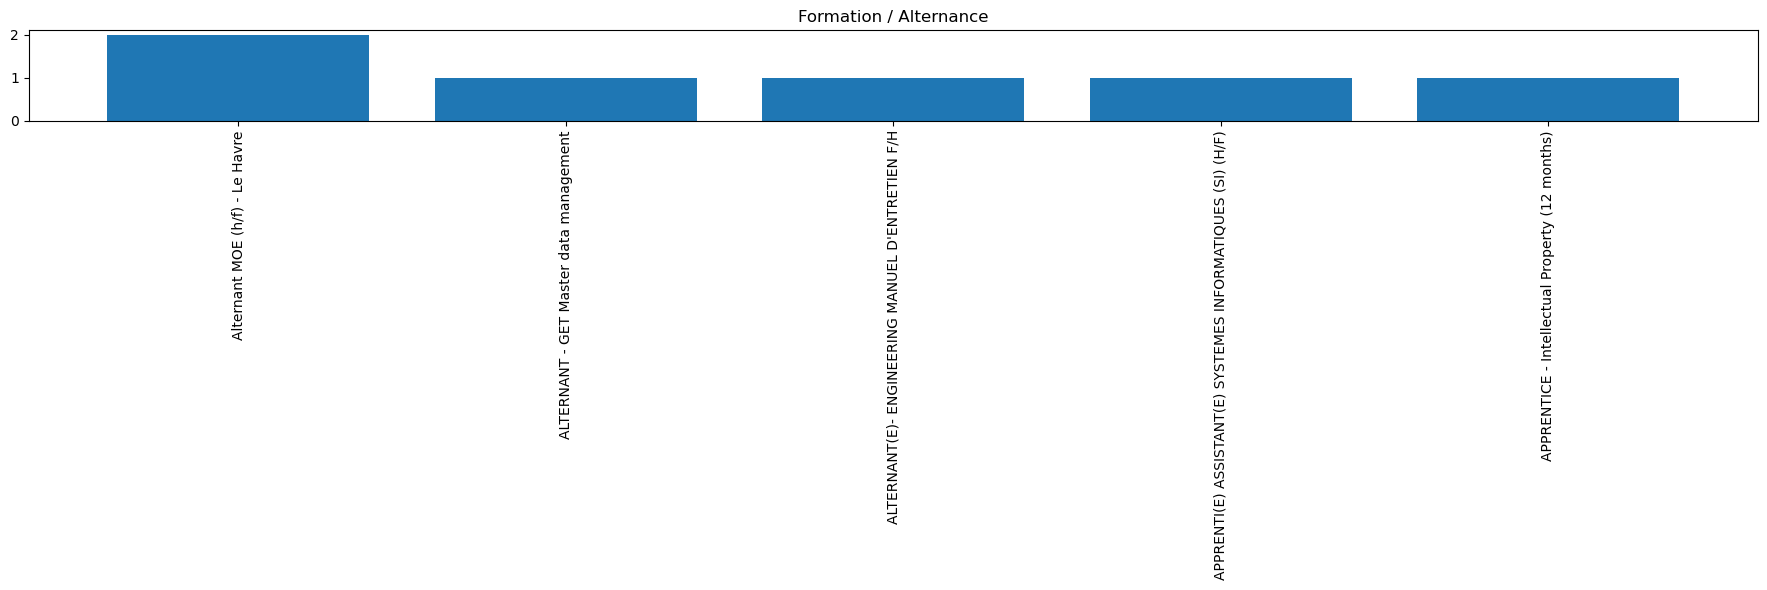

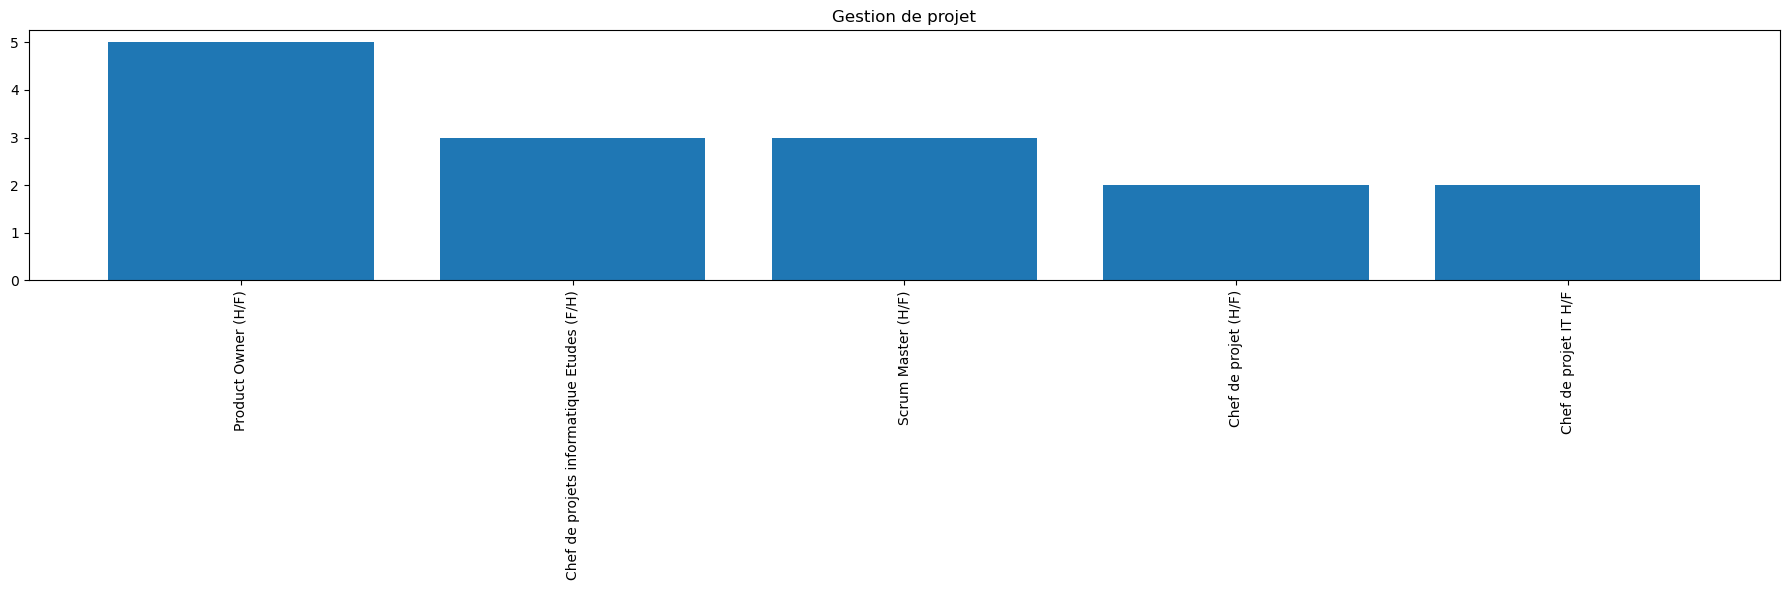

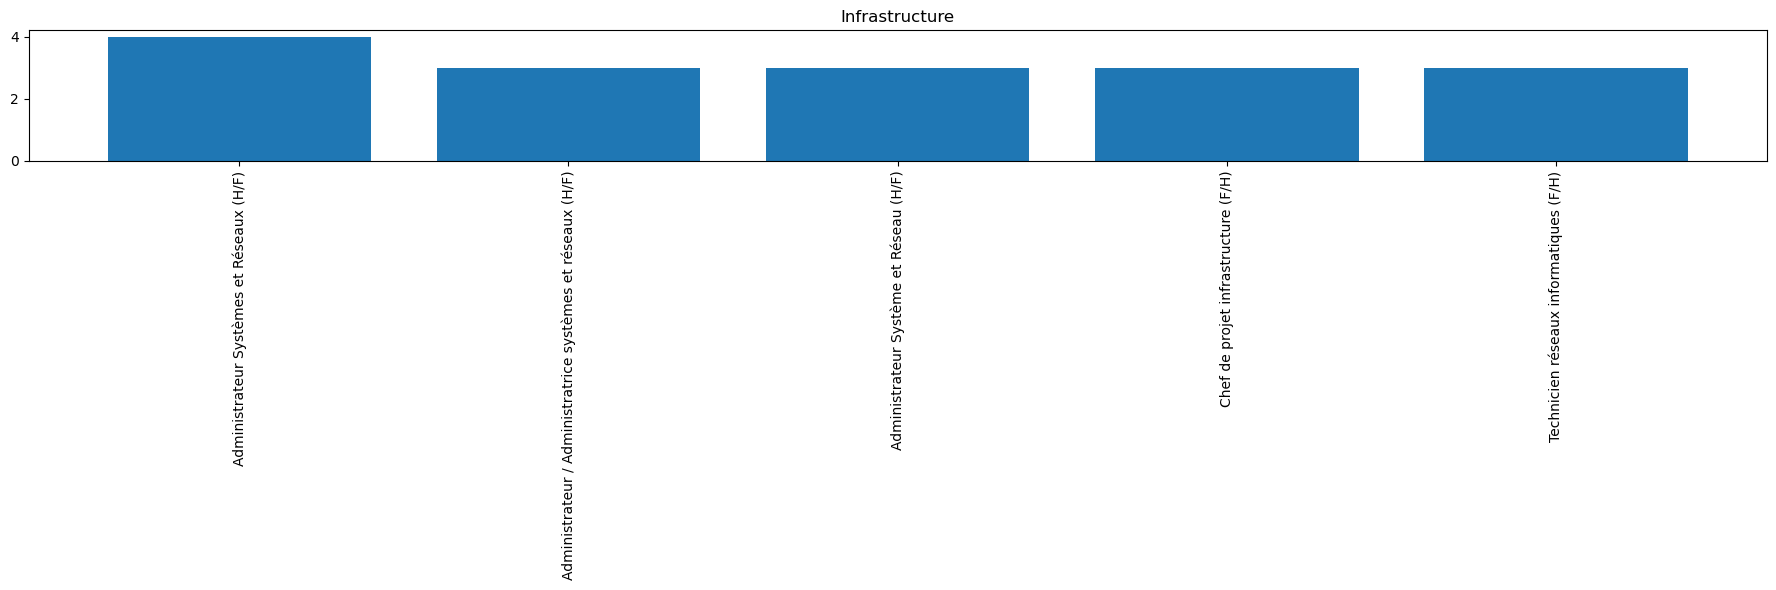

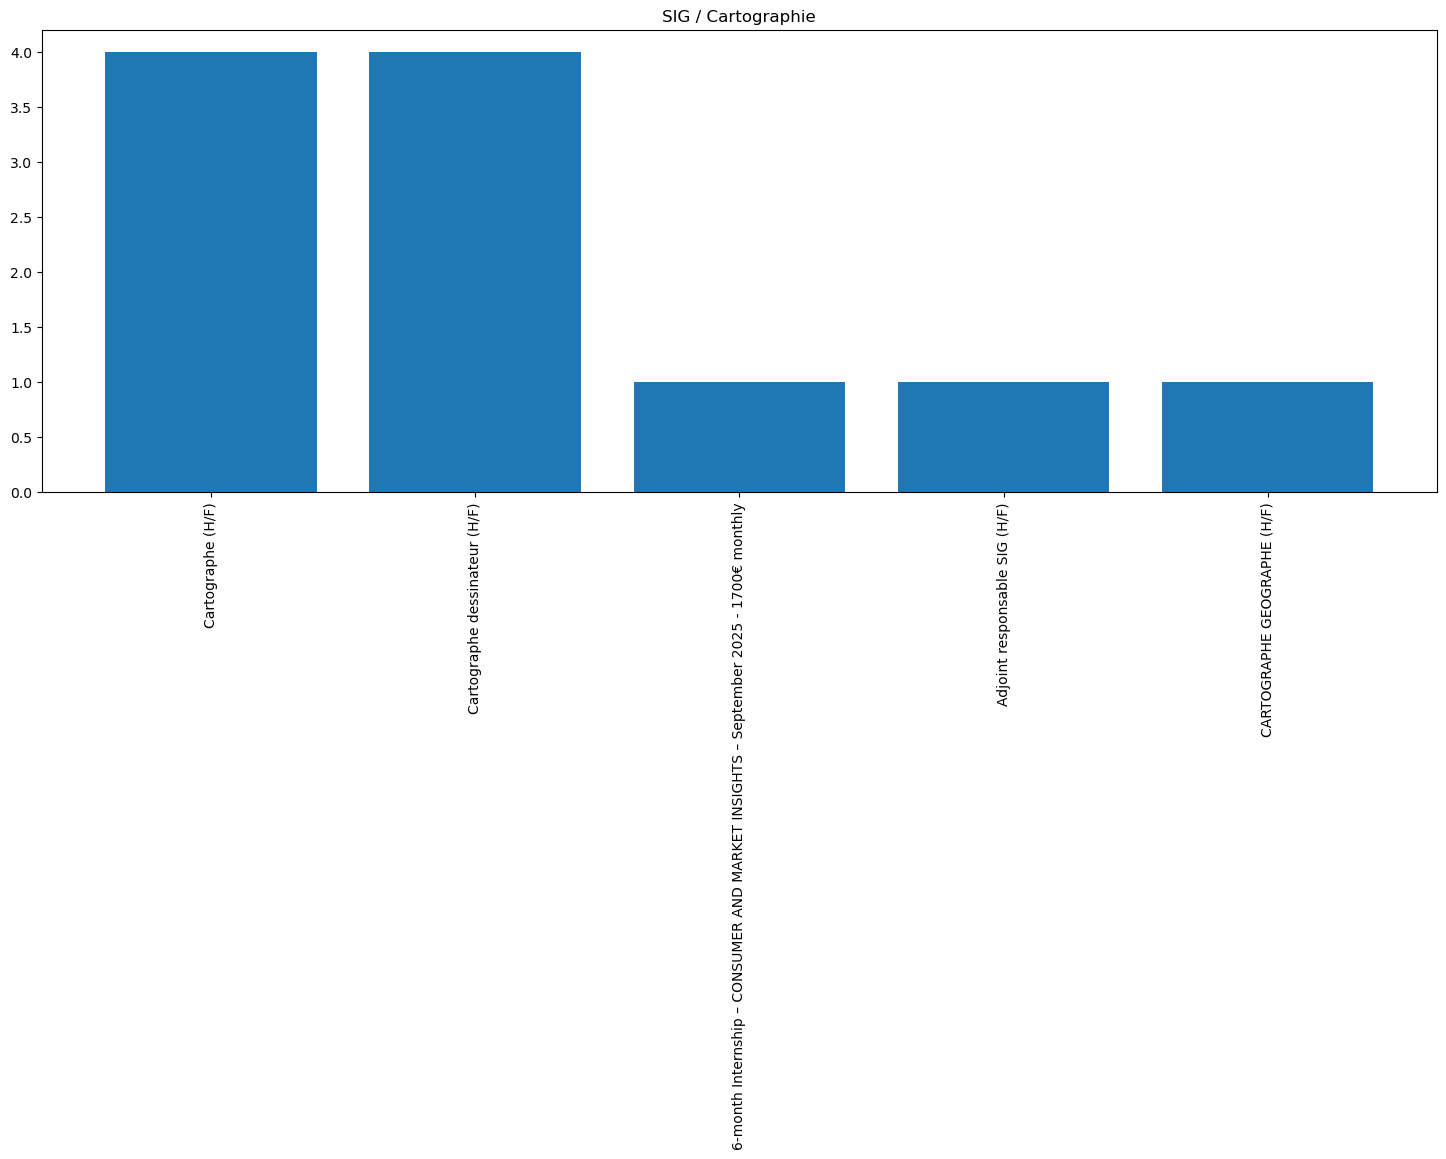

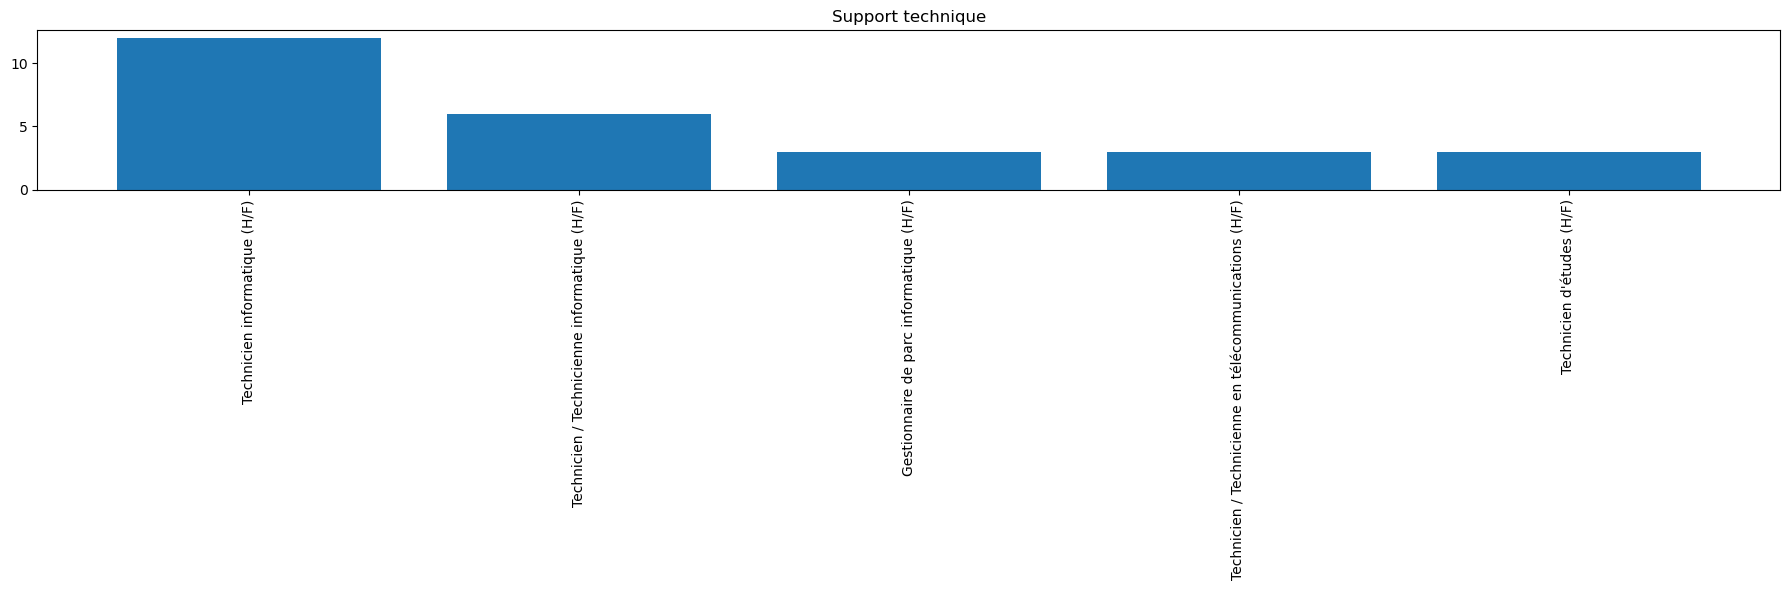

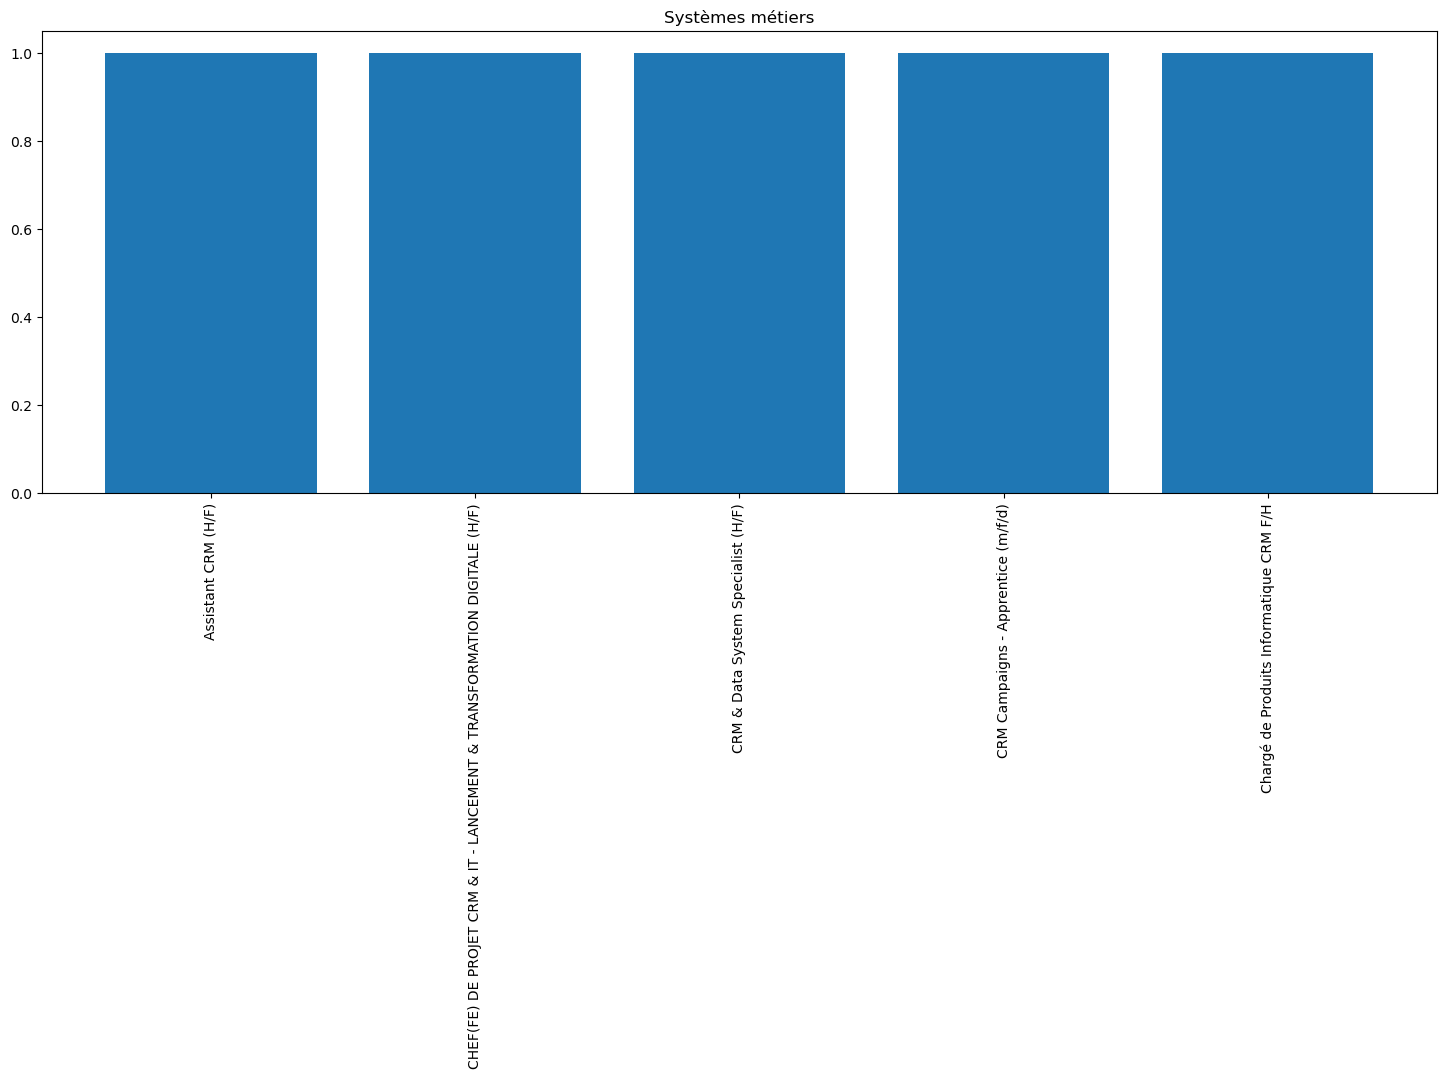

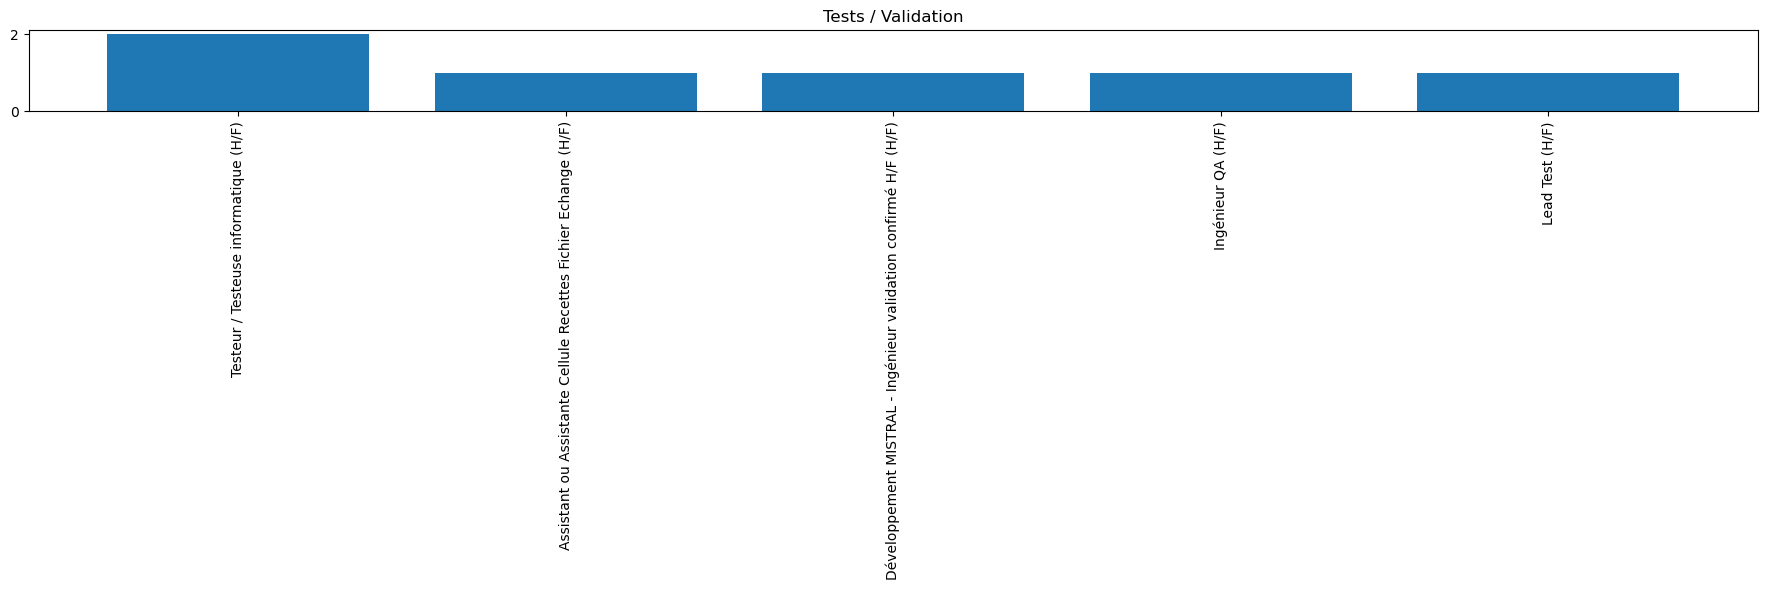

In [27]:


for domaine in df_grouped['domaine_it'].unique() :
    df_domaine = df_grouped[df_grouped['domaine_it'] == domaine].head(5) # Afficher les 5  domiane  les plus fréquentes
    plt.figure(figsize = (18 , 6))
    plt.bar(df_domaine['Titre'] , df_domaine['count'])
    plt.xticks(rotation=90) # Faire pivoter les étiquettes de l'axe x
    plt.title(domaine) # Ajouter un titre pour chaque graphique
    plt.tight_layout() # Ajuster la mise en page pour éviter les coupures
    plt.show()